# Relax Data Science Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
user = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [3]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
user.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
#Convert times to datetimes
user['creation_time'] = pd.to_datetime(user['creation_time'])
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'], unit='s')

In [6]:
user.tail(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,2014-01-26 08:57:12,0,1,0,NaN


In [7]:
user.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,0.432742,0.356432,124.056723,3383.761968
min,1.00000,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000


In [8]:
user['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [9]:
user['opted_in_to_mailing_list'].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [10]:
user['enabled_for_marketing_drip'].value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [11]:
df = user.set_index('creation_time')
q = df['object_id'].resample('Q').count()

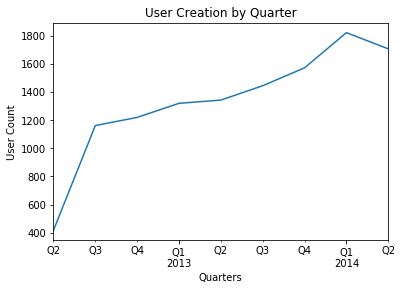

In [12]:
_ = q.plot()
_ = plt.title('User Creation by Quarter')
_ = plt.xlabel('Quarters')
_ = plt.ylabel('User Count')
plt.show()

User creation trends upward. Data is not complete for the Q1/Q2 of 2012 and Q3/Q4 of 2014.

### Feature Engineering User Engagement Table

In [13]:
user_eng = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1')

In [14]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [15]:
print('Distinct User IDs:', len(user_eng.user_id.unique()))

Distinct User IDs: 8823


In [16]:
user_eng['time_stamp'] = pd.to_datetime(user_eng['time_stamp'])
user_eng.set_index(['time_stamp'], inplace=True)
user_eng.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [19]:
#Use unique id's to create dataframe index
index_usereng = user_eng.user_id.unique()
df = pd.DataFrame(index=index_usereng)
df.shape

(8823, 0)

In [20]:
#Create target variable

adopted = user_eng.groupby('user_id')['visited'].resample('7D').sum() > 2 
adopted = adopted.reset_index()
adopted.rename(columns = {'visited':'adopted'},inplace=True)

In [21]:
user_adopted = adopted[adopted['adopted']==True]['user_id'].unique()
df['adopted'] = np.where(df.index.isin(user_adopted),1, 0)

In [22]:
df['adopted'] = np.where(df.index.isin(user_adopted),1, 0)

In [23]:
df.adopted.value_counts()

0    7351
1    1472
Name: adopted, dtype: int64

In [24]:
print('User Adoption Percentage:',len(df[df['adopted']==1])/len(df)*100)

User Adoption Percentage: 16.683667686727873


In [25]:
u = user_eng.reset_index()
u['diff'] = u.groupby('user_id')['time_stamp'].diff().dt.days

In [26]:
avg_days_btw_login = u[u['diff'].isnull()==False].groupby('user_id')['diff'].mean()

In [27]:
df = df.merge(avg_days_btw_login, left_index=True, right_index=True, how='left')
df.rename(columns={'diff':'avg_days_between'}, inplace=True)

In [28]:
login_count = user_eng.groupby('user_id').count()
df = df.merge(login_count, left_index=True, right_index=True, how='left')
df.rename(columns={'visited':'login_count'}, inplace=True)

In [29]:
#Median was used since I wanted to only look at a single occurrence instead of a count
quarter = user_eng.groupby('user_id')['visited'].resample('Q').median()
quarter = quarter.reset_index()
quarter['quarter'] = quarter['time_stamp'].dt.quarter
quarter_count = quarter[['user_id','visited','quarter']].groupby(['user_id', 'quarter']).sum()
quarter_count = quarter_count.unstack()
quarter_count.columns = quarter_count.columns.get_level_values(1)
quarter_count.rename(columns={1:'Q1', 2:'Q2', 3:'Q3', 4:'Q4'}, inplace=True)

In [30]:
df = df.merge(quarter_count, left_index=True, right_index=True, how='left')

In [31]:
day = user_eng.groupby('user_id')['visited'].resample('12H').median()
day = day.reset_index()
day['hour'] = day['time_stamp'].dt.hour
day['hour'].replace({0:'AM', 12:'PM'}, inplace=True)

In [32]:
day_cycle_count = day[['user_id','visited','hour']].groupby(['user_id', 'hour']).median()
day_cycle_count = day_cycle_count.unstack()
day_cycle_count.columns = day_cycle_count.columns.get_level_values(1)

In [33]:
df = df.merge(day_cycle_count, left_index=True, right_index=True, how='left')

In [34]:
dayofweek = user_eng.reset_index()
dayofweek['weekday_name'] = dayofweek['time_stamp'].dt.weekday_name
dayofweek_count = dayofweek[['weekday_name','user_id', 'visited']].groupby(['user_id', 'weekday_name']).median()
dayofweek_count = dayofweek_count.unstack(level=1)
dayofweek_count.columns = dayofweek_count.columns.get_level_values(1)

In [35]:
dayofweek['is_weekend'] = np.where(dayofweek['weekday_name'].isin(['Sunday','Saturday']),'Weekend','Weekday')
is_weekend = dayofweek[['is_weekend','user_id', 'visited']].groupby(['user_id', 'is_weekend']).median()
is_weekend = is_weekend.unstack(level=1)
is_weekend.columns = is_weekend.columns.get_level_values(1)

In [36]:
df = df.merge(is_weekend, left_index=True, right_index=True, how='left')

In [37]:
#df = df.merge(dayofweek_count, left_index=True, right_index=True, how='left')

In [38]:
df.fillna(0, inplace=True)

In [39]:
df.head()

,adopted,avg_days_between,login_count,Q1,Q2,Q3,Q4,AM,PM,Weekday,Weekend
1,0,0.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,10.461538,14,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0,0.000000,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,0.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0,0.000000,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Feature Engineering User Info Table

In [40]:
index2 = user.object_id
df2 = pd.DataFrame(index=index2)
df2.shape

(12000, 0)

In [41]:
user.set_index('object_id', inplace=True)

In [42]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 937.5+ KB


In [43]:
#Month and year extraction

#df2['creation_month'] = user['creation_time'].dt.month
df2['creation_year'] = user['creation_time'].dt.year
df2['creation_quarter'] = user['creation_time'].dt.quarter
df2['creation_hour'] = user['creation_time'].dt.hour
#df2['last_session_month'] = user['last_session_creation_time'].dt.month
#df2['last_session_year'] = user['last_session_creation_time'].dt.year

In [44]:
#Was the user invited?
df2['invited'] = np.where(user['invited_by_user_id'].isna()==False, 1, 0)

In [45]:
import re
#extract email domain
email = user['email'].apply(lambda x: re.split(r"@(.*)\.", x))
df2['email'] = [x[1] for x in email]

In [46]:
df2.head()

,creation_year,creation_quarter,creation_hour,invited,email
object_id,,,,,
1,2014,2,3,1,yahoo
2,2013,4,3,1,gustr
3,2013,1,23,1,gustr
4,2013,2,8,1,yahoo
5,2013,1,10,1,yahoo


In [47]:
#Target variable has less users than the users table, the users that only show up in user_eng will be used
final_df = pd.DataFrame(index=index_usereng) 

In [48]:
#Merge features created from user engagement
final_df = final_df.merge(df, left_index=True, right_index=True)

In [49]:
#Merge features created from user info
final_df = final_df.merge(df2, left_index=True, right_index=True)

In [50]:
#Merge columns from original user info table
user_df = user[['creation_source', 'opted_in_to_mailing_list',
                'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']]

final_df = final_df.merge(user_df, left_index=True, right_index=True)

In [51]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 21 columns):
adopted                       8823 non-null int64
avg_days_between              8823 non-null float64
login_count                   8823 non-null int64
Q1                            8823 non-null float64
Q2                            8823 non-null float64
Q3                            8823 non-null float64
Q4                            8823 non-null float64
AM                            8823 non-null float64
PM                            8823 non-null float64
Weekday                       8823 non-null float64
Weekend                       8823 non-null float64
creation_year                 8823 non-null int64
creation_quarter              8823 non-null int64
creation_hour                 8823 non-null int64
invited                       8823 non-null int64
email                         8823 non-null object
creation_source               8823 non-null object
opted_in_to_mailing_li

In [52]:
final_df.fillna(0, inplace=True)
final_df.head()

,adopted,avg_days_between,login_count,Q1,Q2,Q3,Q4,AM,PM,Weekday,...,creation_year,creation_quarter,creation_hour,invited,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,0,0.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,2014,2,3,1,yahoo,GUEST_INVITE,1,0,11,10803.0
2,1,10.461538,14,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,2013,4,3,1,gustr,ORG_INVITE,0,0,1,316.0
3,0,0.000000,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2013,1,23,1,gustr,ORG_INVITE,0,0,94,1525.0
4,0,0.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,2013,2,8,1,yahoo,GUEST_INVITE,0,0,1,5151.0
5,0,0.000000,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,2013,1,10,1,yahoo,GUEST_INVITE,0,0,193,5240.0


### Machine Learning Model

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [54]:
features = final_df.drop(columns='adopted')
target = final_df['adopted']

In [55]:
features = pd.get_dummies(features, columns=['email', 
                                             'creation_source', 
                                             'org_id', 
                                             'invited_by_user_id'])

In [56]:
features.shape

(8823, 3480)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=34)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6176, 3480) (6176,)
(2647, 3480) (2647,)


In [58]:
dummy = DummyClassifier(random_state=34)
dummy_fit = dummy.fit(X_train, y_train)
print('Baseline Model Accuracy Score:', dummy_fit.score(X_test, y_test))

Baseline Model Accuracy Score: 0.7306384586324141


In [59]:
%%time
rf = RandomForestClassifier(random_state=34)
cv_rf = cross_val_score(rf, X_train, y_train, cv=5)
print('Average CV Score RF:', cv_rf.mean())

Average CV Score RF: 0.9776556215033475
CPU times: user 24 s, sys: 1.09 s, total: 25.1 s
Wall time: 26.8 s


In [60]:
%%time
param_grid_rf = {'n_estimators': [50, 100, 200, 500],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth': [5, 15, 30, None]}

rf_search = RandomizedSearchCV(rf, param_distributions = param_grid_rf, cv=5)
rf_search_fit = rf_search.fit(X_train, y_train)
rf_search_predict = rf_search_fit.predict(X_test)

CPU times: user 4min 57s, sys: 10.2 s, total: 5min 7s
Wall time: 5min 23s


In [61]:
print('Best Score:', rf_search_fit.best_score_)
print('Best Parameter:', rf_search_fit.best_params_)
print('Test Score:', accuracy_score(y_test, rf_search_predict))
print(classification_report(y_test, rf_search_predict))
print(confusion_matrix(y_test, rf_search_predict)) 

Best Score: 0.9781411894186549
Best Parameter: {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None}
Test Score: 0.9769550434454098
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2198
           1       0.96      0.90      0.93       449

    accuracy                           0.98      2647
   macro avg       0.97      0.95      0.96      2647
weighted avg       0.98      0.98      0.98      2647

[[2183   15]
 [  46  403]]


In [62]:
rf_importance = rf_search_fit.best_estimator_.feature_importances_

In [63]:
feature_importance = pd.DataFrame(zip(features.columns, rf_importance), columns=['Features', 'Importance'])

In [64]:
feature_importance.sort_values('Importance', ascending=False).head(10)

,Features,Importance
1,login_count,0.243141
0,avg_days_between,0.120045
3,Q2,0.115575
2,Q1,0.093827
9,Weekend,0.077411
5,Q4,0.068762
4,Q3,0.034299
8,Weekday,0.027698
11,creation_quarter,0.018789
12,creation_hour,0.011602
